# Predicting 12 Month Delaware Basin Oil Cum - Modeling
Capstone Project Two  Andy Clark
Introduction:
## 1. The Problem:
The business problem addressed here is to predict the 12 month oil cum for horizontal wells drilled in the Delaware Basin located in Texas and New Mexico.  The economics of drilling new wells relies heavliy on the well performance to pay for the signicant capital investment in drilling the well.  The 12 month oil cum is a good predictor of the estimated overall oil recovery over many years.  Predicting the 12 month cum cum oil can help optimize a companies drilling program by drilling the most economic wells.

## 2. The Data:
I downloaded the data from Enervus which has many features, many will not make sense to correlate to oil production.  The first step in my modelling will be to remove many features with no expected impact on oil production.

## 3. The questions of interest:
This data analysis and story-telling report is organized around the following questions of interest:
What features most accurately predict 12 month cum oil?  How are completion design and spacing affecting the 12 month cum oil.  Some areas of the basin are more prolific than others, how will the model account for the geology?  There are also PVT differences around the basin as well as local differences.  


## 4. Import the necessary libraries and the data:
To start, let's first import all the necessary modules and libraries and read the data set into the Pandas dataframe. These are some data wrangling and exploratory analysis from the previous part. 

In [64]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('CompletionStudy_4_26_2022.csv')

C:\Users\asclark\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (49,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [66]:
df.head()

,API_UWI,Unformatted_API_UWI,API_UWI_12,Unformatted_API_UWI_12,API_UWI_14,Unformatted_API_UWI_14,WellID,CompletionID,WellPadID,WellPadDirection,...,EnvVerticalSpacingClassSameZone,VerticalParentChildAtDrillTimeAnyZone,EnvVerticalSpacingClassAtDrillTimeAnyZone,VerticalParentChildAnyZone,EnvVerticalSpacingClassAnyZone,VerticalParentChildAtDrillTime100dVZone,EnvVerticalSpacingClassAtDrillTime100dVZone,VerticalParentChild100dVZone,EnvVerticalSpacingClass100dVZone,Proppant_per_stage
0,42-389-34829,4238934829,42-389-34829-00,423893482900,42-389-34829-00-00,42389348290000,840420000646001,840421002248487,42-389-34829,N,...,S,STANDALONE,S,STANDALONE,S,STANDALONE,S,STANDALONE,S,NaN
1,42-109-32820,4210932820,42-109-32820-00,421093282000,42-109-32820-00-00,42109328200000,840420000589835,840421002024737,42-109-32820,N,...,S,STANDALONE,S,STANDALONE,S,STANDALONE,S,STANDALONE,S,NaN
2,42-389-34982,4238934982,42-389-34982-00,423893498200,42-389-34982-00-00,42389349820000,840420000643362,840421002080685,42-389-34982,S,...,S,STANDALONE,S,PARENT,P |,STANDALONE,S,PARENT,P |,NaN
3,42-301-32825,4230132825,42-301-32825-00,423013282500,42-301-32825-00-00,42301328250000,840420000624388,840421002080958,42-301-32631,S,...,S,CHILD,C |,PARENT,P |,CHILD,C |,CHILD,C |,NaN
4,42-475-36869,4247536869,42-475-36869-00,424753686900,42-475-36869-00-00,42475368690000,840420000650260,840421002156581,42-475-36869,SW,...,S,CHILD,C |,CHILD,P | C,STANDALONE,S,STANDALONE,S,NaN


In [67]:
df.shape

(14909, 364)

In [68]:
my_list = df.columns.values.tolist()
my_list

['API_UWI',
 'Unformatted_API_UWI',
 'API_UWI_12',
 'Unformatted_API_UWI_12',
 'API_UWI_14',
 'Unformatted_API_UWI_14',
 'WellID',
 'CompletionID',
 'WellPadID',
 'WellPadDirection',
 'ENVWellGrouping',
 'CompletionNumber',
 'WellName',
 'Country',
 'StateProvince',
 'County',
 'Lease',
 'LeaseName',
 'ENVOperator',
 'RawOperator',
 'InitialOperator',
 'ENVTicker',
 'ENV_Peer_Group',
 'ENV_Stock_Exchange',
 'ENVWellServiceProvider',
 'ENVProdWellType',
 'StateWellType',
 'ENVWellType',
 'ENVProducingMethod',
 'ENVRegion',
 'ENVBasin',
 'ENVPlay',
 'ENVSubPlay',
 'ENVInterval',
 'ENVIntervalSource',
 'ENVSpacingAssumption',
 'ENVWellStatus',
 'OnConfidential',
 'OffConfidentialDate',
 'Trajectory',
 'ENVWellboreType',
 'Formation',
 'FirstProdDate',
 'Latitude',
 'Longitude',
 'Latitude_BH',
 'Longitude_BH',
 'TVD_FT',
 'MD_FT',
 'District',
 'Field',
 'Block',
 'Abstract',
 'Platform',
 'Section',
 'Township',
 'Range',
 'Section_Township_Range',
 'Unit_Name',
 'WellNumber',
 'SurfaceL

In [69]:
drop_cols = ['API_UWI',
 'Unformatted_API_UWI',
 'API_UWI_12',
 'Unformatted_API_UWI_12',
 'API_UWI_14','WellID',
 'CompletionID',
 'WellPadID',
 'WellPadDirection',
 'ENVWellGrouping',
 'CompletionNumber','Country',
 'StateProvince',
 'County','ENVTicker',
 'ENV_Peer_Group',
 'ENV_Stock_Exchange','ENVProdWellType',
 'StateWellType',
 'ENVWellType',
 'ENVProducingMethod',
 'ENVRegion',
 'ENVBasin',
 'ENVPlay',
 'ENVSubPlay','ENVIntervalSource','ENVWellStatus',
 'OnConfidential',
 'OffConfidentialDate',
 'Trajectory',
 'ENVWellboreType','District',
 'Field',
 'Block',
 'Abstract',
 'Platform',
 'Section',
 'Township',
 'Range',
 'Section_Township_Range',
 'Unit_Name',
 'WellNumber','SurfaceLatitudeLongitudeSource',
 'PlugDate',
 'PlugbackMeasuredDepth_FT',
 'PlugbackTrueVerticalDepth_FT',
 'AvgBreakdownPressure_PSI',
 'AvgClusterSpacingPerStage_FT',
 'AvgClusterSpacing_FT',
 'AvgFracGradient_PSIPerFT',
 'AvgISIP_PSI',
 'AvgMillTime_Min',
 'AvgPortSleeveOpeningPressure_PSI',
 'AvgShotsPerCluster',
 'AvgShotsPerFt',
 'AvgTreatmentPressure_PSI',
 'AvgTreatmentRate_BBLPerMin',
 'ClustersPer1,000Ft',
 'ClustersPerStage',
 'ShotsPer1,000Ft',
 'ShotsPerStage',
 'TotalShots',
 'AvgFluidPerCluster_BBL',
 'AvgFluidPerShot_BBL',
 'AvgFluidPerStage_BBL',
 'FracRigOnsiteDate',
 'FracRigReleaseDate','FirstProdQuarter',
 'FirstProdMonth',
 'ENVElevationKB_FT',
 'ENVElevationKBSource',
 'ENVElevationGL_FT',
 'ENVElevationGLSource',
 'ElevationKB_FT',
 'ElevationGL_FT',
 'CoordinateSource',
 'PermitApprovedDate',
 'PermitSubmittedDate',
 'SpudDate',
 'DrillingEndDate',
 'RigReleaseDate',
 'CompletionDate',
 'FirstDay',
 'ENVCompInsertedDate',
 'StateFileNumber','PermitToSpud_DAYS',
 'SpudToRigRelease_DAYS',
 'SpudToCompletion_DAYS',
 'SpudToSales_DAYS', 'NumberOfStrings',
 'UpperPerf_FT',
 'LowerPerf_FT',
 'PerfInterval_FT','AcidVolume_BBL',
 'Bottom_Hole_Temp_DEGF',
 'Biocide_LBS',
 'Breaker_LBS',
 'Buffer_LBS',
 'ClayControl_LBS',
 'CrossLinker_LBS',
 'FrictionReducer_LBS',
 'GellingAgent_LBS',
 'IronControl_LBS',
 'ScaleInhibitor_LBS',
 'Surfactant_LBS',
 'Energizer_LBS',
 'Diverter_LBS',
 'TestDate',
 'ChokeSize_64IN',
 'TestRate_BOEPerDAY',
 'TestRate_BOEPerDAYPer1000FT',
 'TestRate_MCFEPerDAY',
 'OilTestRate_BBLPerDAY',
 'OilTestRate_BBLPerDAYPer1000FT',
 'GasTestRate_MCFPerDAY',
 'GasTestRate_MCFPerDAYPer1000FT',
 'WaterTestRate_BBLPerDAY',
 'WaterTestRate_BBLPerDAYPer1000Ft',
 'WaterDepth',
 'TestWHLiquids_PCT',
 'CasingPressure_PSI',
 'FlowingTubingPressure_PSI',
 'ShutInPressure_PSI',
 'OilProdPriorTest_BBL',
 'OilTestMethodName',
 'OilGravity_API',
 'GasGravity_SG',
 'First3MonthProd_BOE',
 'First3MonthProd_BOEPer1000FT',
 'First3MonthGas_MCF',
 'First3MonthGas_MCFPer1000FT',
 'First3MonthProd_MCFE',
 'First3MonthProd_MCFEPer1000FT',
 'First3MonthOil_BBL',
 'First3MonthOil_BBLPer1000FT',
 'First3MonthWater_BBL',
 'First6MonthProd_BOE',
 'First6MonthProd_BOEPer1000FT',
 'First6MonthGas_MCF',
 'First6MonthGas_MCFPer1000FT',
 'First6MonthProd_MCFE',
 'First6MonthProd_MCFEPer1000FT',
 'First6MonthOil_BBL',
 'First6MonthOil_BBLPer1000FT',
 'First6MonthWater_BBL',
 'First9MonthProd_BOE',
 'First9MonthProd_BOEPer1000FT',
 'First9MonthGas_MCF',
 'First9MonthGas_MCFPer1000FT',
 'First9MonthProd_MCFE',
 'First9MonthProd_MCFEPer1000FT',
 'First9MonthOil_BBL',
 'First9MonthOil_BBLPer1000FT',
 'First9MonthWater_BBL','First36MonthProd_BOE',
 'First36MonthProd_BOEPer1000FT',
 'First36MonthGas_MCF',
 'First36MonthGas_MCFPer1000FT',
 'First36MonthProd_MCFE',
 'First36MonthProd_MCFEPer1000FT',
 'First36MonthOil_BBL',
 'First36MonthOil_BBLPer1000FT',
 'First36MonthWater_BBL',
 'First36MonthWaterProductionBBLPer1000Ft',
 'PeakProductionDate',
 'MonthsToPeakProduction',
 'PeakProd_BOE',
 'PeakProd_BOEPer1000FT',
 'PeakGas_MCF',
 'PeakGas_MCFPer1000FT',
 'PeakProd_MCFE',
 'PeakProd_MCFEPer1000FT',
 'PeakOil_BBL',
 'PeakOil_BBLPer1000FT',
 'PeakWater_BBL',
 'CumProd_BOE',
 'CumProd_BOEPer1000FT',
 'CumGas_MCF',
 'CumGas_MCFPer1000FT',
 'CumProd_MCFE',
 'CumProd_MCFEPer1000FT',
 'CumOil_BBL',
 'CumOil_BBLPer1000FT',
 'CumWater_BBL',
 'TotalProducingMonths',
 'LastProducingMonth',
 'LastMonthLiquidsProduction_BBL',
 'LastMonthGasProduction_MCF',
 'LastMonthWaterProduction_BBL',
 'Last12MonthBOEProduction',
 'Last12MonthGasProduction_MCF',
 'Last12MonthOilProduction_BBL',
 'Last12MonthWaterProduction_BBL','CumulativeSOR',
 'Last3MonthISOR',
 'ToeAngle_DEG',
 'AzimuthFromGridNorth_DEG','ENVOilGatherer',
 'ENVGasGatherer',
 'ENVOilGatheringSystem',
 'ENVGasGatheringSystem','SpudDateSource',
 'TestRate_MCFEPerDAYPer1000FT',
 'FirstProdYear']

In [70]:
df.drop(labels=drop_cols, axis=1, inplace=True)

In [71]:
df.shape

(14909, 160)

In [72]:
my_list = df.columns.values.tolist()
my_list

['Unformatted_API_UWI_14',
 'WellName',
 'Lease',
 'LeaseName',
 'ENVOperator',
 'RawOperator',
 'InitialOperator',
 'ENVWellServiceProvider',
 'ENVInterval',
 'ENVSpacingAssumption',
 'Formation',
 'FirstProdDate',
 'Latitude',
 'Longitude',
 'Latitude_BH',
 'Longitude_BH',
 'TVD_FT',
 'MD_FT',
 'AvgProppantPerCluster_LBS',
 'AvgProppantPerShot_LBS',
 'AvgProppantPerStage_LBS',
 'StimulatedStages',
 'TotalClusters',
 'Vintage',
 'ENVFracJobType',
 'ENVFluidType',
 'CompletionTime_DAYS',
 'CompletionDesign',
 'SoakTime_DAYS',
 'LateralLength_FT',
 'FracStages',
 'AverageStageSpacing_FT',
 'ENVProppantBrand',
 'ProppantLoading_LBSPerGAL',
 'ENVProppantType',
 'ProppantIntensity_LBSPerFT',
 'Proppant_LBS',
 'TotalWaterPumped_GAL',
 'WaterIntensity_GALPerFT',
 'TotalFluidPumped_BBL',
 'FluidIntensity_BBLPerFT',
 'First12MonthProd_BOE',
 'First12MonthProd_BOEPer1000FT',
 'First12MonthGas_MCF',
 'First12MonthGas_MCFPer1000FT',
 'First12MonthProd_MCFE',
 'First12MonthProd_MCFEPer1000FT',
 'F

In [73]:
drop_cols = [ 'Lease','RawOperator','InitialOperator','Latitude_BH','Longitude_BH']
df.drop(labels=drop_cols, axis=1, inplace=True)
df.shape

(14909, 155)

In [74]:
my_list = df.columns.values.tolist()
my_list

['Unformatted_API_UWI_14',
 'WellName',
 'LeaseName',
 'ENVOperator',
 'ENVWellServiceProvider',
 'ENVInterval',
 'ENVSpacingAssumption',
 'Formation',
 'FirstProdDate',
 'Latitude',
 'Longitude',
 'TVD_FT',
 'MD_FT',
 'AvgProppantPerCluster_LBS',
 'AvgProppantPerShot_LBS',
 'AvgProppantPerStage_LBS',
 'StimulatedStages',
 'TotalClusters',
 'Vintage',
 'ENVFracJobType',
 'ENVFluidType',
 'CompletionTime_DAYS',
 'CompletionDesign',
 'SoakTime_DAYS',
 'LateralLength_FT',
 'FracStages',
 'AverageStageSpacing_FT',
 'ENVProppantBrand',
 'ProppantLoading_LBSPerGAL',
 'ENVProppantType',
 'ProppantIntensity_LBSPerFT',
 'Proppant_LBS',
 'TotalWaterPumped_GAL',
 'WaterIntensity_GALPerFT',
 'TotalFluidPumped_BBL',
 'FluidIntensity_BBLPerFT',
 'First12MonthProd_BOE',
 'First12MonthProd_BOEPer1000FT',
 'First12MonthGas_MCF',
 'First12MonthGas_MCFPer1000FT',
 'First12MonthProd_MCFE',
 'First12MonthProd_MCFEPer1000FT',
 'First12MonthOil_BBL',
 'First12MonthOil_BBLPer1000FT',
 'First12MonthWater_BBL',

In [75]:
# Filter all rows with 0 12 month cum oil
df.drop(df[df['First12MonthOil_BBL'] < 5].index, inplace = True)

In [76]:
df.shape

(14852, 155)

In [77]:
# Filter all rows with low lateral length
df.drop(df[df['LateralLength_FT'] < 4500].index, inplace = True)

In [78]:
# Filter all rows with low sand and water
df.drop(df[df['ProppantIntensity_LBSPerFT'] < 1000].index, inplace = True)
df.drop(df[df['WaterIntensity_GALPerFT'] < 420].index, inplace = True)

In [79]:
# Filter all rows with too high sand and water
df.drop(df[df['ProppantIntensity_LBSPerFT'] > 5000].index, inplace = True)
df.drop(df[df['WaterIntensity_GALPerFT'] > 4200].index, inplace = True)

In [80]:
# Filter all rows with out ENV Target
df.ENVInterval.unique()

array(['WOLFCAMP A LOWER', 'DELAWARE VERTICAL', 'WOLFCAMP B LOWER',
       'WOLFCAMP B UPPER', '2ND BONE SPRING', 'WOLFCAMP XY',
       'WOLFCAMP A UPPER', '3RD BONE SPRING SAND', '2ND BONE SPRING SAND',
       '3RD BONE SPRING', 'WOLFCAMP C', 'LOWER AVALON', 'MIDDLE AVALON',
       nan, 'LOWER PENNSYLVANIAN AND MISSISSIPPIAN', 'WOODFORD AND BELOW',
       'WOLFCAMP D', 'UPPER AVALON', '1ST BONE SPRING',
       'ABOVE UPPER AVALON'], dtype=object)

In [81]:
interval_to_drop =['DELAWARE VERTICAL', 'LOWER AVALON', 'MIDDLE AVALON',
        'LOWER PENNSYLVANIAN AND MISSISSIPPIAN', 'WOODFORD AND BELOW',
       'WOLFCAMP D', 'UPPER AVALON', 'nan']

In [82]:
df = df[~df['ENVInterval'].isin(interval_to_drop)]

## 5. Select the feature columns:
The data set has been reduced for unnecessary columns, now pick the feature columns, further reduce the data set that should be most impactful to 12 month cum oil production. Also remove some rows that do not have an entry.

In [83]:
df.columns

Index(['Unformatted_API_UWI_14', 'WellName', 'LeaseName', 'ENVOperator',
       'ENVWellServiceProvider', 'ENVInterval', 'ENVSpacingAssumption',
       'Formation', 'FirstProdDate', 'Latitude',
       ...
       'EnvVerticalSpacingClassSameZone',
       'VerticalParentChildAtDrillTimeAnyZone',
       'EnvVerticalSpacingClassAtDrillTimeAnyZone',
       'VerticalParentChildAnyZone', 'EnvVerticalSpacingClassAnyZone',
       'VerticalParentChildAtDrillTime100dVZone',
       'EnvVerticalSpacingClassAtDrillTime100dVZone',
       'VerticalParentChild100dVZone', 'EnvVerticalSpacingClass100dVZone',
       'Proppant_per_stage'],
      dtype='object', length=155)

In [84]:
my_list = df.columns.values.tolist()
my_list

['Unformatted_API_UWI_14',
 'WellName',
 'LeaseName',
 'ENVOperator',
 'ENVWellServiceProvider',
 'ENVInterval',
 'ENVSpacingAssumption',
 'Formation',
 'FirstProdDate',
 'Latitude',
 'Longitude',
 'TVD_FT',
 'MD_FT',
 'AvgProppantPerCluster_LBS',
 'AvgProppantPerShot_LBS',
 'AvgProppantPerStage_LBS',
 'StimulatedStages',
 'TotalClusters',
 'Vintage',
 'ENVFracJobType',
 'ENVFluidType',
 'CompletionTime_DAYS',
 'CompletionDesign',
 'SoakTime_DAYS',
 'LateralLength_FT',
 'FracStages',
 'AverageStageSpacing_FT',
 'ENVProppantBrand',
 'ProppantLoading_LBSPerGAL',
 'ENVProppantType',
 'ProppantIntensity_LBSPerFT',
 'Proppant_LBS',
 'TotalWaterPumped_GAL',
 'WaterIntensity_GALPerFT',
 'TotalFluidPumped_BBL',
 'FluidIntensity_BBLPerFT',
 'First12MonthProd_BOE',
 'First12MonthProd_BOEPer1000FT',
 'First12MonthGas_MCF',
 'First12MonthGas_MCFPer1000FT',
 'First12MonthProd_MCFE',
 'First12MonthProd_MCFEPer1000FT',
 'First12MonthOil_BBL',
 'First12MonthOil_BBLPer1000FT',
 'First12MonthWater_BBL',

In [85]:
features_y = ['ENVOperator',
 'ENVWellServiceProvider',
 'ENVInterval','Latitude',
 'Longitude',
 'TVD_FT', 'ENVFracJobType',
 'ENVFluidType', 'LateralLength_FT',
 'FracStages','ProppantLoading_LBSPerGAL',
 'ENVProppantType',
 'ProppantIntensity_LBSPerFT','FluidIntensity_BBLPerFT','First12MonthOil_BBL','WellsPerSectionAnyZone',
 'WellsPerSectionSameZone', 'Closest3DDistAtDrillTimeAnyZone_FT',
 'Closest3DDistAtDrillTimeSameZone_FT','Avg3DDistAtDrillTimeAnyZone_FT',
 'Avg3DDistAtDrillTimeSameZone_FT','ParentWellCountAtDrillTimeAnyZone',
 'ParentWellCountAtDrillTimeSameZone']

In [86]:
df = df[features_y]

In [87]:
df.shape

(10354, 23)

In [88]:
df=df.dropna(subset=['First12MonthOil_BBL', 'LateralLength_FT','ProppantIntensity_LBSPerFT','FluidIntensity_BBLPerFT','WellsPerSectionAnyZone', 'WellsPerSectionSameZone'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7177 entries, 1 to 14908
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ENVOperator                          7177 non-null   object 
 1   ENVWellServiceProvider               7176 non-null   object 
 2   ENVInterval                          7173 non-null   object 
 3   Latitude                             7177 non-null   float64
 4   Longitude                            7177 non-null   float64
 5   TVD_FT                               7177 non-null   float64
 6   ENVFracJobType                       6841 non-null   object 
 7   ENVFluidType                         6833 non-null   object 
 8   LateralLength_FT                     7177 non-null   float64
 9   FracStages                           1812 non-null   float64
 10  ProppantLoading_LBSPerGAL            7177 non-null   float64
 11  ENVProppantType              

In [89]:
features = ['ENVInterval','Latitude',
 'Longitude',
 'TVD_FT', 'LateralLength_FT','ProppantLoading_LBSPerGAL',
 'ProppantIntensity_LBSPerFT','FluidIntensity_BBLPerFT','WellsPerSectionAnyZone',
 'WellsPerSectionSameZone', 'Closest3DDistAtDrillTimeAnyZone_FT',
 'Closest3DDistAtDrillTimeSameZone_FT','Avg3DDistAtDrillTimeAnyZone_FT',
 'Avg3DDistAtDrillTimeSameZone_FT','ParentWellCountAtDrillTimeAnyZone',
 'ParentWellCountAtDrillTimeSameZone']

In [90]:
df[features]

,ENVInterval,Latitude,Longitude,TVD_FT,LateralLength_FT,ProppantLoading_LBSPerGAL,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,WellsPerSectionAnyZone,WellsPerSectionSameZone,Closest3DDistAtDrillTimeAnyZone_FT,Closest3DDistAtDrillTimeSameZone_FT,Avg3DDistAtDrillTimeAnyZone_FT,Avg3DDistAtDrillTimeSameZone_FT,ParentWellCountAtDrillTimeAnyZone,ParentWellCountAtDrillTimeSameZone
1,WOLFCAMP A LOWER,31.781484,-104.135137,9053.08,7616.0,1.007404,1657.5867,39.176280,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0
6,WOLFCAMP B LOWER,31.894857,-104.127815,9946.45,10208.0,1.143460,2252.8445,46.909500,4.0,1.0,703.979475,NaN,703.979475,NaN,0.0,0.0
7,WOLFCAMP B UPPER,31.605297,-104.034378,9810.81,5788.0,1.376621,1095.4766,18.946959,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0
8,WOLFCAMP A LOWER,31.782745,-103.893958,10373.73,4596.0,1.089411,1308.0999,28.589070,4.0,3.0,439.297497,645.799182,439.297497,645.799182,0.0,0.0
9,WOLFCAMP A LOWER,31.669476,-103.706177,10816.88,9419.0,1.117987,1804.3873,38.427647,6.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14894,WOLFCAMP B LOWER,31.550578,-103.753705,11228.50,9443.0,1.211387,2554.5007,50.208090,11.0,1.0,611.114872,NaN,661.739060,NaN,2.0,0.0
14899,2ND BONE SPRING SAND,31.969879,-103.872826,9275.01,10189.0,1.407919,2510.3274,42.452500,3.0,1.0,892.200448,NaN,892.200448,NaN,2.0,0.0
14900,2ND BONE SPRING SAND,31.103531,-103.047813,9224.07,10410.0,1.019477,2492.0764,58.201546,6.0,1.0,1246.876694,NaN,1312.918217,NaN,2.0,0.0
14904,WOLFCAMP A LOWER,31.445014,-103.562801,10487.98,9330.0,0.855571,1966.4954,54.725260,3.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0


In [91]:
df['Closest3DDistAtDrillTimeAnyZone_FT'].fillna(2600, inplace=True)
df['Closest3DDistAtDrillTimeSameZone_FT'].fillna(2600, inplace=True)
df['Avg3DDistAtDrillTimeAnyZone_FT'].fillna(2600, inplace=True)
df['Avg3DDistAtDrillTimeSameZone_FT'].fillna(2600, inplace=True)

# Plot up histograms of features

array([[<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'TVD_FT'}>,
        <AxesSubplot:title={'center':'LateralLength_FT'}>],
       [<AxesSubplot:title={'center':'FracStages'}>,
        <AxesSubplot:title={'center':'ProppantLoading_LBSPerGAL'}>,
        <AxesSubplot:title={'center':'ProppantIntensity_LBSPerFT'}>,
        <AxesSubplot:title={'center':'FluidIntensity_BBLPerFT'}>],
       [<AxesSubplot:title={'center':'First12MonthOil_BBL'}>,
        <AxesSubplot:title={'center':'WellsPerSectionAnyZone'}>,
        <AxesSubplot:title={'center':'WellsPerSectionSameZone'}>,
        <AxesSubplot:title={'center':'Closest3DDistAtDrillTimeAnyZone_FT'}>],
       [<AxesSubplot:title={'center':'Closest3DDistAtDrillTimeSameZone_FT'}>,
        <AxesSubplot:title={'center':'Avg3DDistAtDrillTimeAnyZone_FT'}>,
        <AxesSubplot:title={'center':'Avg3DDistAtDrillTimeSameZone_FT'}>,
        <AxesSubplot:title={'center

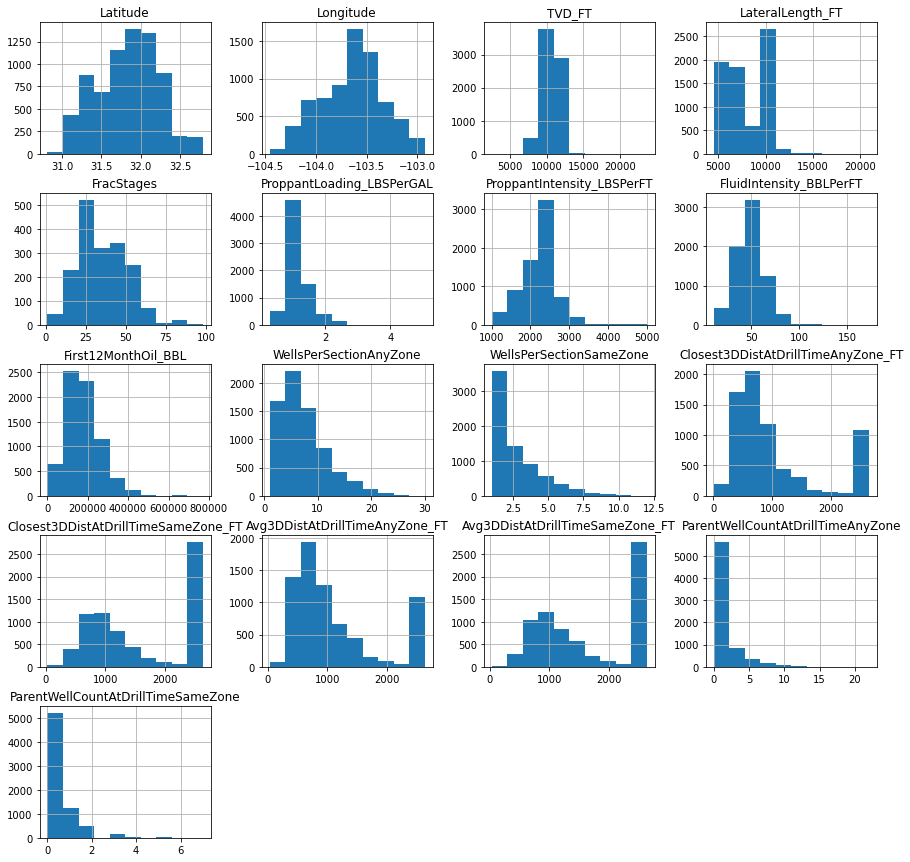

In [92]:
df.hist(figsize = (15,15))

Correlation between various features


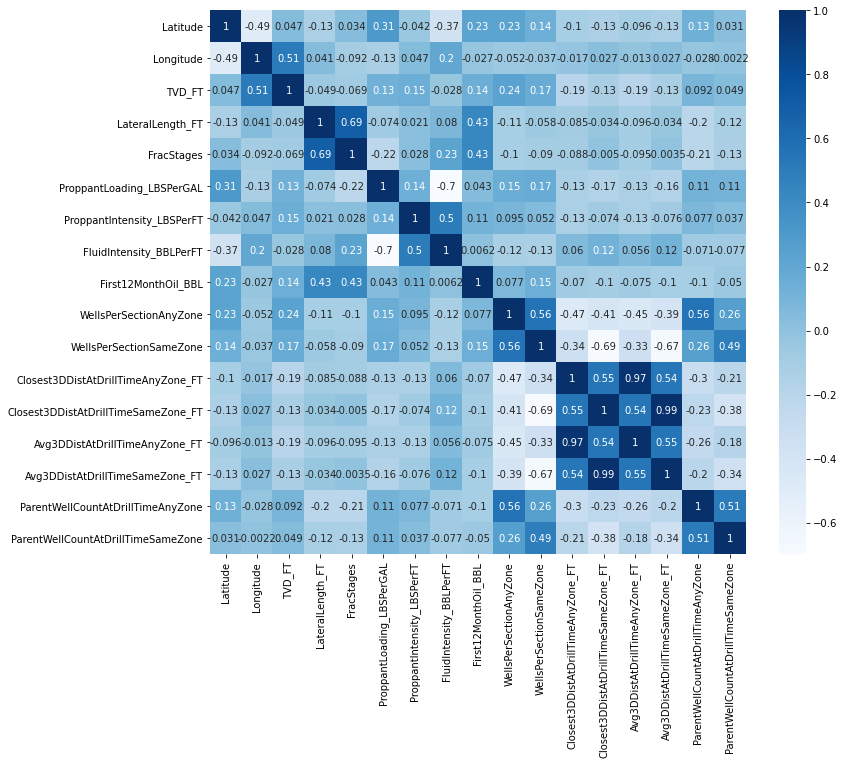

In [93]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues')

In [94]:
df_dummys = pd.get_dummies(df[features], drop_first=True)
df_dummys

,Latitude,Longitude,TVD_FT,LateralLength_FT,ProppantLoading_LBSPerGAL,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,WellsPerSectionAnyZone,WellsPerSectionSameZone,Closest3DDistAtDrillTimeAnyZone_FT,...,ENVInterval_2ND BONE SPRING SAND,ENVInterval_3RD BONE SPRING,ENVInterval_3RD BONE SPRING SAND,ENVInterval_ABOVE UPPER AVALON,ENVInterval_WOLFCAMP A LOWER,ENVInterval_WOLFCAMP A UPPER,ENVInterval_WOLFCAMP B LOWER,ENVInterval_WOLFCAMP B UPPER,ENVInterval_WOLFCAMP C,ENVInterval_WOLFCAMP XY
1,31.781484,-104.135137,9053.08,7616.0,1.007404,1657.5867,39.176280,1.0,1.0,2600.000000,...,0,0,0,0,1,0,0,0,0,0
6,31.894857,-104.127815,9946.45,10208.0,1.143460,2252.8445,46.909500,4.0,1.0,703.979475,...,0,0,0,0,0,0,1,0,0,0
7,31.605297,-104.034378,9810.81,5788.0,1.376621,1095.4766,18.946959,2.0,1.0,2600.000000,...,0,0,0,0,0,0,0,1,0,0
8,31.782745,-103.893958,10373.73,4596.0,1.089411,1308.0999,28.589070,4.0,3.0,439.297497,...,0,0,0,0,1,0,0,0,0,0
9,31.669476,-103.706177,10816.88,9419.0,1.117987,1804.3873,38.427647,6.0,1.0,2600.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14894,31.550578,-103.753705,11228.50,9443.0,1.211387,2554.5007,50.208090,11.0,1.0,611.114872,...,0,0,0,0,0,0,1,0,0,0
14899,31.969879,-103.872826,9275.01,10189.0,1.407919,2510.3274,42.452500,3.0,1.0,892.200448,...,1,0,0,0,0,0,0,0,0,0
14900,31.103531,-103.047813,9224.07,10410.0,1.019477,2492.0764,58.201546,6.0,1.0,1246.876694,...,1,0,0,0,0,0,0,0,0,0
14904,31.445014,-103.562801,10487.98,9330.0,0.855571,1966.4954,54.725260,3.0,1.0,2600.000000,...,0,0,0,0,1,0,0,0,0,0


In [95]:
df_dummys.columns

Index(['Latitude', 'Longitude', 'TVD_FT', 'LateralLength_FT',
       'ProppantLoading_LBSPerGAL', 'ProppantIntensity_LBSPerFT',
       'FluidIntensity_BBLPerFT', 'WellsPerSectionAnyZone',
       'WellsPerSectionSameZone', 'Closest3DDistAtDrillTimeAnyZone_FT',
       'Closest3DDistAtDrillTimeSameZone_FT', 'Avg3DDistAtDrillTimeAnyZone_FT',
       'Avg3DDistAtDrillTimeSameZone_FT', 'ParentWellCountAtDrillTimeAnyZone',
       'ParentWellCountAtDrillTimeSameZone', 'ENVInterval_2ND BONE SPRING',
       'ENVInterval_2ND BONE SPRING SAND', 'ENVInterval_3RD BONE SPRING',
       'ENVInterval_3RD BONE SPRING SAND', 'ENVInterval_ABOVE UPPER AVALON',
       'ENVInterval_WOLFCAMP A LOWER', 'ENVInterval_WOLFCAMP A UPPER',
       'ENVInterval_WOLFCAMP B LOWER', 'ENVInterval_WOLFCAMP B UPPER',
       'ENVInterval_WOLFCAMP C', 'ENVInterval_WOLFCAMP XY'],
      dtype='object')

In [96]:
features = ['TVD_FT', 'LateralLength_FT',
       'ProppantLoading_LBSPerGAL', 'ProppantIntensity_LBSPerFT',
       'FluidIntensity_BBLPerFT', 'WellsPerSectionAnyZone',
       'WellsPerSectionSameZone', 'Closest3DDistAtDrillTimeAnyZone_FT',
       'Closest3DDistAtDrillTimeSameZone_FT', 'Avg3DDistAtDrillTimeAnyZone_FT',
       'Avg3DDistAtDrillTimeSameZone_FT', 'ParentWellCountAtDrillTimeAnyZone',
       'ParentWellCountAtDrillTimeSameZone', 'ENVInterval_2ND BONE SPRING',
       'ENVInterval_2ND BONE SPRING SAND', 'ENVInterval_3RD BONE SPRING',
       'ENVInterval_3RD BONE SPRING SAND', 'ENVInterval_ABOVE UPPER AVALON',
       'ENVInterval_WOLFCAMP A LOWER', 'ENVInterval_WOLFCAMP A UPPER',
       'ENVInterval_WOLFCAMP B LOWER', 'ENVInterval_WOLFCAMP B UPPER',
       'ENVInterval_WOLFCAMP C', 'ENVInterval_WOLFCAMP XY']

In [97]:
# Now create the features X and y set
y = df.First12MonthOil_BBL
X = df_dummys[features]

In [98]:
y

1        238979.00
6        124593.24
7         22234.00
8        103996.00
9        405154.20
           ...    
14894    215886.00
14899    384439.00
14900    151880.00
14904    283910.00
14908    265725.00
Name: First12MonthOil_BBL, Length: 7177, dtype: float64

In [99]:
X

,TVD_FT,LateralLength_FT,ProppantLoading_LBSPerGAL,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,WellsPerSectionAnyZone,WellsPerSectionSameZone,Closest3DDistAtDrillTimeAnyZone_FT,Closest3DDistAtDrillTimeSameZone_FT,Avg3DDistAtDrillTimeAnyZone_FT,...,ENVInterval_2ND BONE SPRING SAND,ENVInterval_3RD BONE SPRING,ENVInterval_3RD BONE SPRING SAND,ENVInterval_ABOVE UPPER AVALON,ENVInterval_WOLFCAMP A LOWER,ENVInterval_WOLFCAMP A UPPER,ENVInterval_WOLFCAMP B LOWER,ENVInterval_WOLFCAMP B UPPER,ENVInterval_WOLFCAMP C,ENVInterval_WOLFCAMP XY
1,9053.08,7616.0,1.007404,1657.5867,39.176280,1.0,1.0,2600.000000,2600.000000,2600.000000,...,0,0,0,0,1,0,0,0,0,0
6,9946.45,10208.0,1.143460,2252.8445,46.909500,4.0,1.0,703.979475,2600.000000,703.979475,...,0,0,0,0,0,0,1,0,0,0
7,9810.81,5788.0,1.376621,1095.4766,18.946959,2.0,1.0,2600.000000,2600.000000,2600.000000,...,0,0,0,0,0,0,0,1,0,0
8,10373.73,4596.0,1.089411,1308.0999,28.589070,4.0,3.0,439.297497,645.799182,439.297497,...,0,0,0,0,1,0,0,0,0,0
9,10816.88,9419.0,1.117987,1804.3873,38.427647,6.0,1.0,2600.000000,2600.000000,2600.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14894,11228.50,9443.0,1.211387,2554.5007,50.208090,11.0,1.0,611.114872,2600.000000,661.739060,...,0,0,0,0,0,0,1,0,0,0
14899,9275.01,10189.0,1.407919,2510.3274,42.452500,3.0,1.0,892.200448,2600.000000,892.200448,...,1,0,0,0,0,0,0,0,0,0
14900,9224.07,10410.0,1.019477,2492.0764,58.201546,6.0,1.0,1246.876694,2600.000000,1312.918217,...,1,0,0,0,0,0,0,0,0,0
14904,10487.98,9330.0,0.855571,1966.4954,54.725260,3.0,1.0,2600.000000,2600.000000,2600.000000,...,0,0,0,0,1,0,0,0,0,0


## 6. Applying the Machine Learning models:
This is a regression problem, in supervised learning. Here we have used the following regression models:

* Multiple Linear Regression
* Random Forest

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

# Create Train Test Split

In [100]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
from statsmodels.graphics.api import abline_plot # Plots a line given an intercept and slope
from sklearn.metrics import mean_squared_error, r2_score # Calculates MSE and R2 for a model compared to data.
from sklearn.model_selection import train_test_split #  Split arrays or matrices into random train and test subsets.
from sklearn import linear_model, preprocessing # It's a package the contains many different linear regression models.

# Splitting the dataset into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

In [101]:

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
rModel = LinearRegression()

# We now want to train the model on our test data.
rModel.fit(X_train, y_train)

# Evaluate the model  
print(rModel.score(X_train, y_train))

0.3609272070437065


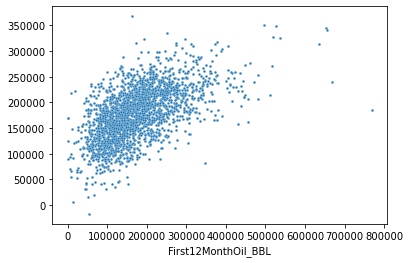

In [102]:
# Use the model to make predictions about our test data
rModel_y_pred = rModel.predict(X_test)

# Let's plot the predictions against the actual result. Use scatter()
_ = sns.scatterplot(x=y_test, y=rModel_y_pred.reshape(-1), s=7)
plt.show()

# OLS MLR

In [103]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
from statsmodels.graphics.api import abline_plot # Plots a line given an intercept and slope
from sklearn.metrics import mean_squared_error, r2_score # Calculates MSE and R2 for a model compared to data.
from sklearn.model_selection import train_test_split #  Split arrays or matrices into random train and test subsets.
from sklearn import linear_model, preprocessing # It's a package the contains many different linear regression models.

In [104]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
MLR = sm.OLS(y_train, X_train)

# Fit the model with fit() 
MLR_results = MLR.fit()

# Evaluate the model
MLR_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     First12MonthOil_BBL   R-squared (uncentered):                   0.880
Model:                             OLS   Adj. R-squared (uncentered):              0.879
Method:                  Least Squares   F-statistic:                              1520.
Date:                 Wed, 11 May 2022   Prob (F-statistic):                        0.00
Time:                         15:22:54   Log-Likelihood:                         -63063.
No. Observations:                 5023   AIC:                                  1.262e+05
Df Residuals:                     4999   BIC:                                  1.263e+05
Df Model:                           24                                                  
Covariance Type:             nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
TVD_FT                                 10.2017      0.776     13.141      0.000       8.680      11.724
LateralLength_FT                       16.1249      0.440     36.620      0.000      15.262      16.988
ProppantLoading_LBSPerGAL            -5.35e+04   5403.050     -9.901      0.000   -6.41e+04   -4.29e+04
ProppantIntensity_LBSPerFT             36.1582      3.731      9.692      0.000      28.845      43.472
FluidIntensity_BBLPerFT             -1077.8716    151.898     -7.096      0.000   -1375.659    -780.085
WellsPerSectionAnyZone               1208.1216    339.990      3.553      0.000     541.591    1874.652
WellsPerSectionSameZone              6287.1948    932.042      6.746      0.000    4459.984    8114.406
Closest3DDistAtDrillTimeAnyZone_FT     -1.7862      5.786     -0.309      0.758     -13.130       9.557
Closest3DDistAtDrillTimeSameZone_FT    12.0868      9.148      1.321      0.186      -5.847      30.021
Avg3DDistAtDrillTimeAnyZone_FT          5.7606      5.914      0.974      0.330      -5.833      17.354
Avg3DDistAtDrillTimeSameZone_FT       -11.5582      9.200     -1.256      0.209     -29.595       6.478
ParentWellCountAtDrillTimeAnyZone   -3363.3768    622.211     -5.406      0.000   -4583.183   -2143.570
ParentWellCountAtDrillTimeSameZone  -6708.5184   1667.562     -4.023      0.000   -9977.671   -3439.366
ENVInterval_2ND BONE SPRING         -5.903e+04   1.15e+04     -5.131      0.000   -8.16e+04   -3.65e+04
ENVInterval_2ND BONE SPRING SAND    -4051.1834   7734.620     -0.524      0.600   -1.92e+04    1.11e+04
ENVInterval_3RD BONE SPRING         -4.712e+04   8943.598     -5.269      0.000   -6.47e+04   -2.96e+04
ENVInterval_3RD BONE SPRING SAND    -2.246e+04   8552.335     -2.626      0.009   -3.92e+04   -5694.763
ENVInterval_ABOVE UPPER AVALON      -5.656e+04   3.15e+04     -1.793      0.073   -1.18e+05    5273.381
ENVInterval_WOLFCAMP A LOWER        -6.082e+04   7880.584     -7.718      0.000   -7.63e+04   -4.54e+04
ENVInterval_WOLFCAMP A UPPER        -4.147e+04   7919.184     -5.237      0.000    -5.7e+04   -2.59e+04
ENVInterval_WOLFCAMP B LOWER        -9.087e+04   9291.755     -9.780      0.000   -1.09e+05   -7.27e+04
ENVInterval_WOLFCAMP B UPPER        -8.139e+04   8487.483     -9.590      0.000    -9.8e+04   -6.48e+04
ENVInterval_WOLFCAMP C              -1.266e+05   9167.345    -13.815      0.000   -1.45e+05   -1.09e+05
ENVInterval_WOLFCAMP XY             -2.056e+04   8296.948     -2.478      0.013   -3.68e+04   -4292.400
==============================================================================
Omnibus:                      690.376   Durbin-Watson:                   1.983
Prob(Om

In [105]:
# Use our new model to make predictions
y_pred = MLR_results.predict(X_test)

In [106]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 53801.4081627592
Mean Squared Error: 5047381397.629701
Root Mean Squared Error: 71044.92520672888


Text(0, 0.5, 'Predictions for 12 Month Cum Oil')

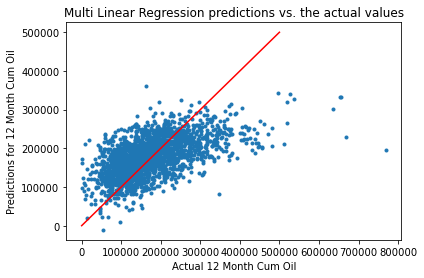

In [107]:
# Plot the predictions
# Build a scatterplot
plt.plot(y_test, y_pred, marker='.', linestyle='none')

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(0,500000)],[x for x in range(0,500000)], color='red')

# Label it nicely
plt.title("Multi Linear Regression predictions vs. the actual values")
plt.xlabel('Actual 12 Month Cum Oil')
plt.ylabel('Predictions for 12 Month Cum Oil')

# Making a Linear Regression avoiding redundancy

In [108]:
features = ['ENVOperator', 'ENVInterval', 'Latitude',
       'Longitude', 'TVD_FT', 'LateralLength_FT',
       'ProppantIntensity_LBSPerFT','First12MonthOil_BBL',
       'Avg3DDistAtDrillTimeAnyZone_FT']

In [109]:
df_dummys = pd.get_dummies(df[features], drop_first=True)
df_dummys.columns

Index(['Latitude', 'Longitude', 'TVD_FT', 'LateralLength_FT',
       'ProppantIntensity_LBSPerFT', 'First12MonthOil_BBL',
       'Avg3DDistAtDrillTimeAnyZone_FT', 'ENVOperator_ABRAXAS PETROLEUM',
       'ENVOperator_ADMIRAL PERMIAN RESOURCES',
       'ENVOperator_ADVANCE ENERGY PARTNERS, LLC', 'ENVOperator_AMEREDEV II',
       'ENVOperator_APA CORP', 'ENVOperator_ASCENT ENERGY INC',
       'ENVOperator_ATLANTIC RESOURCES', 'ENVOperator_BATTALION OIL',
       'ENVOperator_BP', 'ENVOperator_BRAHMAN OIL & GAS, LLC',
       'ENVOperator_BTA OIL PRODUCERS', 'ENVOperator_CAIRD OPERATING',
       'ENVOperator_CALLON', 'ENVOperator_CAPITAN ENERGY',
       'ENVOperator_CATENA RESOURCES OPERATING LLC',
       'ENVOperator_CAZA PETROLEUM',
       'ENVOperator_CENTENNIAL RESOURCE DEVELOPMENT', 'ENVOperator_CHEVRON',
       'ENVOperator_CHISHOLM ENERGY', 'ENVOperator_COLGATE OPERATING',
       'ENVOperator_CONOCOPHILLIPS', 'ENVOperator_CONTANGO RESOURCES LLC',
       'ENVOperator_CONTINENTAL RESOUR

In [110]:
# Now create the features X and y set
y = df.First12MonthOil_BBL
# Include the columns that are not collinear in the model

X = df_dummys[df_dummys.columns[~df_dummys.columns.isin(['First12MonthOil_BBL'])]]

In [111]:
# Splitting the dataset into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
MLR2 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
MLR2_results = MLR2.fit()

# Evaluate the model
MLR2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     First12MonthOil_BBL   R-squared (uncentered):                   0.893
Model:                             OLS   Adj. R-squared (uncentered):              0.892
Method:                  Least Squares   F-statistic:                              487.3
Date:                 Wed, 11 May 2022   Prob (F-statistic):                        0.00
Time:                         15:22:55   Log-Likelihood:                         -62753.
No. Observations:                 5023   AIC:                                  1.257e+05
Df Residuals:                     4938   BIC:                                  1.262e+05
Df Model:                           85                                                  
Covariance Type:             nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Latitude                                      6.408e+04   4144.313     15.463      0.000     5.6e+04    7.22e+04
Longitude                                     2.153e+04   1274.735     16.890      0.000     1.9e+04     2.4e+04
TVD_FT                                          10.6905      1.043     10.248      0.000       8.646      12.736
LateralLength_FT                                17.4735      0.459     38.087      0.000      16.574      18.373
ProppantIntensity_LBSPerFT                      18.7226      2.170      8.627      0.000      14.468      22.977
Avg3DDistAtDrillTimeAnyZone_FT                   7.1164      1.395      5.102      0.000       4.382       9.851
ENVOperator_ABRAXAS PETROLEUM                 3.623e+04   2.68e+04      1.350      0.177   -1.64e+04    8.88e+04
ENVOperator_ADMIRAL PERMIAN RESOURCES         1.654e+04   2.26e+04      0.732      0.464   -2.78e+04    6.08e+04
ENVOperator_ADVANCE ENERGY PARTNERS, LLC     -7833.9019   2.47e+04     -0.317      0.751   -5.63e+04    4.06e+04
ENVOperator_AMEREDEV II                       4.332e+04   2.44e+04      1.778      0.075   -4443.632    9.11e+04
ENVOperator_APA CORP                          3.639e+04   2.12e+04      1.715      0.086   -5210.984     7.8e+04
ENVOperator_ASCENT ENERGY INC                 2.176e+04   5.02e+04      0.434      0.665   -7.66e+04     1.2e+05
ENVOperator_ATLANTIC RESOURCES               -3.978e+04   5.01e+04     -0.795      0.427   -1.38e+05    5.84e+04
ENVOperator_BATTALION OIL                     1.527e+04   2.22e+04      0.687      0.492   -2.83e+04    5.88e+04
ENVOperator_BP                                7.838e+04   2.07e+04      3.778      0.000    3.77e+04    1.19e+05
ENVOperator_BRAHMAN OIL & GAS, LLC           -7.276e+04   6.82e+04     -1.067      0.286   -2.06e+05    6.09e+04
ENVOperator_BTA OIL PRODUCERS                 4.727e+04   2.18e+04      2.173      0.030    4615.950    8.99e+04
ENVOperator_CAIRD OPERATING                  -2.396e-09   6.46e-09     -0.371      0.711   -1.51e-08    1.03e-08
ENVOperator_CALLON                            6.195e+04   2.06e+04      3.006      0.003    2.16e+04    1.02e+05
ENVOperator_CAPITAN ENERGY                    5.993e+04   2.45e+04      2.448      0.014    1.19e+04    1.08e+05
ENVOperator_CATENA RESOURCES OPERATING LLC   -7.102e+04   6.81e+04     -1.043      0.297   -2.05e+05    6.25e+04
ENVOperator_CAZA PETROLEUM                    1.653e+04   3.52e+04      0.469      0.639   -5.25e+04    8.56e+04
ENVOperator_CENTENNIAL RESOURCE DEVELOPMENT   5.292e+04   2.05e+04      2.581      0.010    1.27e+04    9.31e+04
ENVOperator_CHEVRON                

In [113]:
# Use our new model to make predictions
y_pred = MLR2_results.predict(X_test)

Text(0, 0.5, 'Predictions for 12 Month Cum Oil')

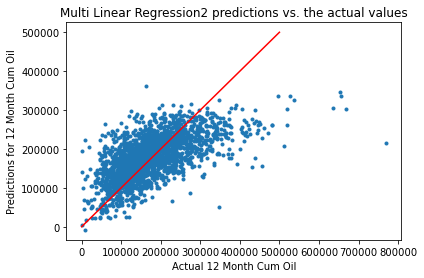

In [114]:
# Plot the predictions
# Build a scatterplot
plt.plot(y_test, y_pred, marker='.', linestyle='none')

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(0,500000)],[x for x in range(0,500000)], color='red')

# Label it nicely
plt.title("Multi Linear Regression2 predictions vs. the actual values")
plt.xlabel('Actual 12 Month Cum Oil')
plt.ylabel('Predictions for 12 Month Cum Oil')

In [115]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 50189.32619412084
Mean Squared Error: 4592667509.325059
Root Mean Squared Error: 67769.22243411871


In [116]:
score = MLR2_results.rsquared()
print("R-squared:", score) 

TypeError: 'numpy.float64' object is not callable

# Ridge Regression

In [117]:
#Import ML models:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Splitting the dataset into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.35920745 0.35145999 0.36623804 0.35605958 0.35585536]


# Random Forest Regression

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

In [119]:
# Plug in appropriate max_depth and random_state parameters 
rfr = RandomForestRegressor()

# Model and fit
rfr.fit(X_train, y_train)

score = rfr.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9360748378041964


In [120]:
# make a prediction
ypred = rfr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  3317185890.074253
RMSE:  1658592945.0371265


Text(0, 0.5, 'Predictions for 12 Month Cum Oil')

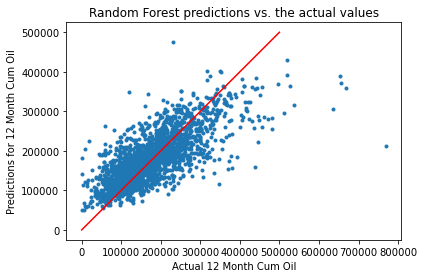

In [121]:
# Plot the predictions
# Build a scatterplot
plt.plot(y_test, ypred, marker='.', linestyle='none')

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(0,500000)],[x for x in range(0,500000)], color='red')

# Label it nicely
plt.title("Random Forest predictions vs. the actual values")
plt.xlabel('Actual 12 Month Cum Oil')
plt.ylabel('Predictions for 12 Month Cum Oil')

In [122]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Error: 41497.62893790808
Mean Squared Error: 3317185890.074253
Root Mean Squared Error: 57595.01619128389


In [123]:
score = rfr.score(X_test, y_test)
print("R-squared:", score) 

R-squared: 0.5582974585156563
